<a href="https://colab.research.google.com/github/Yuva486/BHARAT-INTERN/blob/main/BHARAT_INTERN_task_3_NUMBER_RECOGNIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#IMPORTING NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [48]:
#LOAD AND PREPROCESS THE MNIST DATASET
(x_train, y_train),(x_test, y_test)= keras.datasets.mnist.load_data()

In [49]:
# @title Default title text
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [50]:
#DISPLAY DATASET INFORMATION
print("Number of training samples:", len(x_train))
print("Number of testing samples:",len(x_test))
print("Shape of an individual sample:",x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


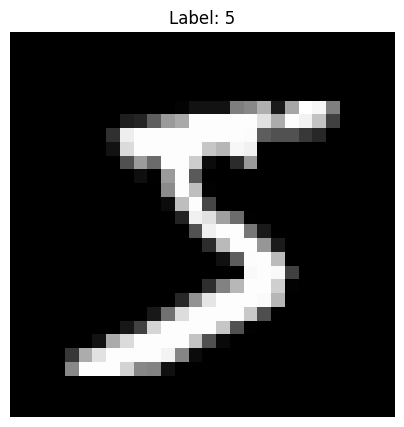

In [51]:
#VISUALIZE A SAMPLE IMAGE
plt.figure(figsize=(5,5))
plt.imshow(x_train[0],cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [52]:
#SCALE THE DATA SO THAT THE VALUES ARE FROM 0 - 1
x_train - x_train / 255
x_test - x_test / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [53]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [54]:
# FLATTEN THE DATA
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

In [55]:
#BUILD AND COMPILE THE SIMPLE MODEL
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#TRAIN THE MODEL
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.2904 - accuracy: 0.8437
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1989 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6529 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5158 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3996 - accuracy: 0.8869


In [56]:
#EVALUATE THE MODEL ON TEST DATA
test_loss, test_accuracy=model.evaluate(x_test_flattened,y_test)
print(f"Test loss: {test_loss:.4f},Test accuracy: {test_accuracy:.4f}")
model.fit(x_train_flattened,y_train,epochs=5)

313/313 [==============================] - 1s 2ms/step - loss: 6.1362 - accuracy: 0.8844
Test loss: 6.1362,Test accuracy: 0.8844
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3936 - accuracy: 0.8877
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2450 - accuracy: 0.8893
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2110 - accuracy: 0.8910
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3158 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2327 - accuracy: 0.8904


In [57]:
#MAKE PREDICTIONS ON THE TEST DATA
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


In [58]:
#CREATE CONFUSION MATRIX
cn = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

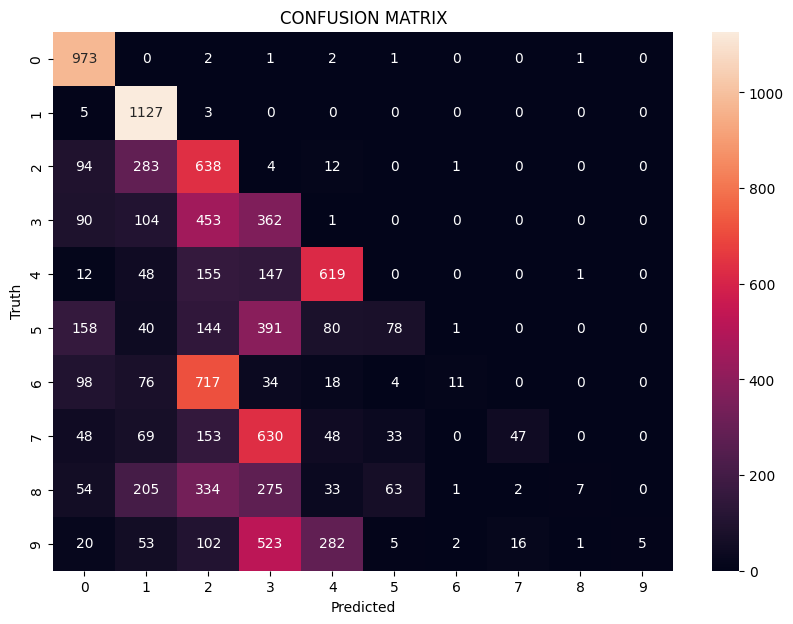

In [59]:
#PLOT CONFUSION MATRIX
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CONFUSION MATRIX')
plt.show()

In [60]:
#BUILD AND COMPILE A MODEL WITH HIDDEN LAYER
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#TRAIN THE MODEL WITH HIDDEN LAYER
model_with_hidden.fit(x_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5333 - accuracy: 0.8440
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3978 - accuracy: 0.9068
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.9257
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2498 - accuracy: 0.9358
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2318 - accuracy: 0.9395


In [61]:
#EVALUATE THE MODEL WITH HIDDEN LAYER ON TEST DATA
hidden_test_loss, hidden_test_accuracy = model_with_hidden.evaluate(x_test_flattened,y_test)
print(f"Test accuracy with hidden layer : {hidden_test_accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2732 - accuracy: 0.9341
Test accuracy with hidden layer : 0.9341


In [63]:
#DISPLAY SAMPLE PREDICTIONS
sample_indices = np.random.randint(0, len(x_test),size=5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

#FLATTEN THE SAMPLE IMAGES
sample_images_flattened = sample_images.reshape(len(sample_images), -1)
sample_predictions= model_with_hidden.predict(sample_images_flattened)
predicted_classes= np.argmax(sample_predictions, axis=1)

1/1 [==============================] - 0s 21ms/step


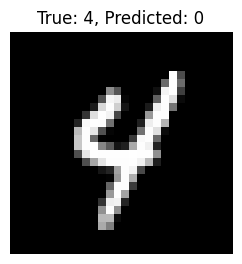

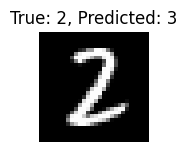

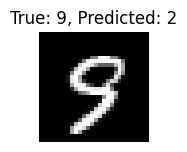

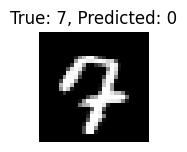

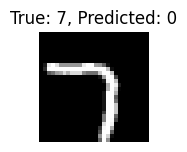

In [64]:
#DISPLAY SAMPLE IMAGES,TRUE LABELS, AND PREDICTED LABELS
plt.figure(figsize=(12,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(sample_images[i],cmap='gray')
  plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_classes[i]}")
  plt.axis('off')

  plt.tight_layout()
  plt.show()